In [1]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')

Using TensorFlow backend.







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
img_path = 'C:/Users/andre/Documents/cats_and_dogs_small/test/dogs/dog.1700.jpg'
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
# Его форма (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


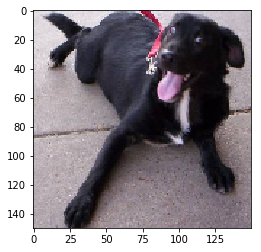

In [10]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [12]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

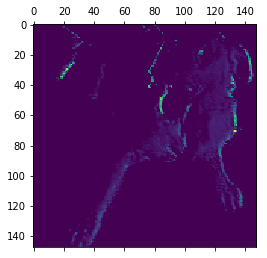

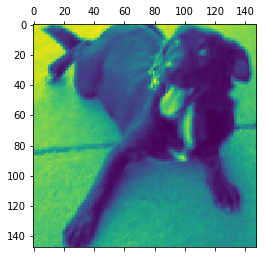

In [15]:
activations = activation_model.predict(img_tensor)
first_layer_activation=activations[0]
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')
plt.matshow(first_layer_activation[0, :, :, 8], cmap='viridis')

In [16]:
from keras.applications import VGG16
from keras import backend as K
model = VGG16(weights='imagenet',
 include_top=False)
layer_name = 'block3_conv1'
filter_index = 0
layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [18]:
grads = K.gradients(loss, model.input)[0] 
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
iterate = K.function([model.input], [loss, grads])
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128
step=1
for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step

In [19]:
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1 
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x 

In [20]:
def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    img = input_img_data[0]
    return deprocess_image(img) 

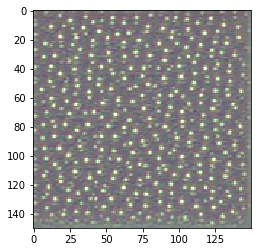

In [21]:
 plt.imshow(generate_pattern('block3_conv1', 0))

In [ ]:
layer_name = 'block1_conv1'
size = 64
margin = 5

In [22]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')

553467904/553467096 [==============================] - 91s 0us/step


In [23]:
import os
imdb_dir = 'C:\\Users\\andre\\Documents\\aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
